### Introduction
In this file I use the data prepared in the EDA1 and EDA2 notebooks for perform ML classification.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
def showResults(prediction,y_test):
    """
    prints accurasy score, confusion matrix and classification report
    """
    print("Accuraccy score: {:.2f}% ".format(100 * accuracy_score(prediction, y_test)))
    print("\n Confusion matrix: \n",confusion_matrix(prediction, y_test))
    print("\n classification report: \n",classification_report(prediction, y_test))

In [4]:
df = pd.read_pickle("EDA2.pkl")

# Machine Learning - Classification Algorithms

I perform training using different ML methods:
1. K nearest neighbours
2. Naive Bayes
3. Support Vector Machine 
4. Logistic Regression
5. Decision Tree
6. Random Forest


For each algorithm some optimisation is done.

Then the comparison of accuracy is done.

This is the first version of the module more advanced analysis will be gradually added.




In [5]:
df.sample(5)

,age,balance,duration,campaign,pdays,previous,job_is__admin.,job_is__blue-collar,job_is__entrepreneur,job_is__housemaid,...,loan_is__no,loan_is__yes,contact_is__cellular,contact_is__telephone,contact_is__unknown,poutcome_is__failure,poutcome_is__other,poutcome_is__success,poutcome_is__unknown,y
10904,0.881694,-0.756234,-0.756470,-0.007492,-0.416056,-0.375262,0,1,0,0,...,1,0,1,0,0,0,0,0,1,0
28150,-0.426419,-0.071676,-0.488280,0.867420,3.251742,1.281214,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
4832,-1.734533,-1.012943,-0.872445,-0.007492,-0.416056,-0.375262,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
26003,-0.627668,-0.282588,-0.241834,-0.882404,2.538280,2.109452,0,0,1,0,...,1,0,1,0,0,1,0,0,0,0
27652,-0.527043,0.101874,0.345285,-0.007492,2.246866,3.765927,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0


### Data splitting

Creating training and testing sets.


In [6]:
X = df.iloc[:,:-1]
y = df["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)




In [7]:
# DataFrame to compare all methods
comparison = pd.DataFrame(columns = ["Name", "Accuracy"])

## K Nearest Neighbours classification

In [8]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train, y_train);

In [9]:
prediction = classifier.predict(X_test)
showResults(prediction,y_test)

Accuraccy score: 92.16% 

 Confusion matrix: 
 [[9907  754]
 [ 104  180]]

 classification report: 
               precision    recall  f1-score   support

           0       0.99      0.93      0.96     10661
           1       0.19      0.63      0.30       284

    accuracy                           0.92     10945
   macro avg       0.59      0.78      0.63     10945
weighted avg       0.97      0.92      0.94     10945



In [10]:
a,b = classifier.score(X_train,y_train), classifier.score(X_test,y_test)
print(f"Accuracy for train set: {100*a:.2f}%, for test set: {100*b:.2f}%, difference: {100*(a-b):.2f}")

Accuracy for train set: 93.28%, for test set: 92.16%, difference: 1.12


### Optimisation - the elbow method

In [11]:
data = []
for i in range(1,30):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train, y_train)
    error = 1 - accuracy_score(classifier.predict(X_test), y_test)
    data.append([i,error])


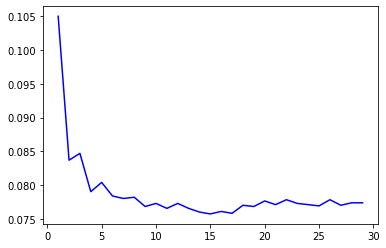

In [12]:
x = [a[0] for a in data]
y = [a[1] for a in data]
plt.plot(x,y,color='blue')

In [13]:
# we chose cut off on the level 10
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)
showResults(prediction,y_test)


Accuraccy score: 92.27% 

 Confusion matrix: 
 [[9928  763]
 [  83  171]]

 classification report: 
               precision    recall  f1-score   support

           0       0.99      0.93      0.96     10691
           1       0.18      0.67      0.29       254

    accuracy                           0.92     10945
   macro avg       0.59      0.80      0.62     10945
weighted avg       0.97      0.92      0.94     10945



In [14]:
comparison = comparison.append({"Name" : "KNN", "Accuracy" : accuracy_score(prediction, y_test)},
                               ignore_index = True)

## Naive Bayes

### Inproved NB Bayesian

In [15]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
import numpy as np

In this case one has to be cautious. Data contains two typed of features: numerical and categorical. It means one cannot use a standard sklearn method gaussian neither binomial. One need to combine them both. I split test data into two groups and apply a proper method for them, later I  use *predict_proba* method to get probabilities and I combine the results by multiplying probabilities for different categories from those two method. Then I chose a larger value to predict categories.

In [16]:
# splitting train and test data into categorical and continuous features

X_train_gauss = X_train.iloc[:,:6]
X_train_bi =  X_train.iloc[:, 6:]
X_test_gauss = X_test.iloc[:,:6]
X_test_bi =  X_test.iloc[:, 6:]

In [17]:
X_test_gauss

,age,balance,duration,campaign,pdays,previous
23108,-0.527043,0.080180,-0.568012,-0.882404,-0.416056,-0.375262
28168,0.680446,-0.211480,-0.683986,1.742332,-0.416056,-0.375262
31503,2.994801,2.408640,-0.234586,0.867420,1.071161,1.281214
6847,-1.231412,-0.756234,1.251334,1.742332,-0.416056,-0.375262
2320,1.183567,-0.724899,0.055350,-0.882404,-0.416056,-0.375262
...,...,...,...,...,...,...
21084,0.982319,-0.979197,-0.799961,-0.882404,-0.416056,-0.375262
5652,0.680446,-1.886719,-0.227338,-0.007492,-0.416056,-0.375262
8443,0.177326,0.028356,-1.060903,-0.882404,-0.416056,-0.375262
31985,1.887936,-0.755029,-0.350560,-0.007492,3.392424,2.109452


In [18]:
X_train_bi

,job_is__admin.,job_is__blue-collar,job_is__entrepreneur,job_is__housemaid,job_is__management,job_is__retired,job_is__self-employed,job_is__services,job_is__student,job_is__technician,...,housing_is__yes,loan_is__no,loan_is__yes,contact_is__cellular,contact_is__telephone,contact_is__unknown,poutcome_is__failure,poutcome_is__other,poutcome_is__success,poutcome_is__unknown
30503,0,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
20457,0,0,1,0,0,0,0,0,0,0,...,1,0,1,1,0,0,1,0,0,0
10614,0,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
23399,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
20168,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
6265,0,0,0,0,1,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1
11284,0,0,0,0,1,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1
860,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1


In [19]:
# training two different model 

classifier_gauss = GaussianNB()
classifier_gauss.fit(X_train_gauss, y_train);
classifier_cat = CategoricalNB()
classifier_cat.fit(X_train_bi, y_train);

In [20]:
# getting probabilities for two models

score_cat = classifier_cat.predict_proba(X_test_bi)
score_gauss = classifier_gauss.predict_proba(X_test_gauss)

In [21]:
def NB_predict(score_gauss,score_cat):
    '''
    Function calculating predicted categories. We multiply input results and choose larger probabilities. 
    As a result function returns np array with predicted categories  
    '''
    size = len(score_gauss)
    result = np.ndarray(size)
    for i in range(size):
        if score_gauss[i,0] * score_cat[i,0] < score_gauss[i,1] * score_cat[i,1]:
            result[i] = 1
        else:
            result[i] = 0
    return result

In [22]:
result = NB_predict(score_gauss,score_cat)


In [23]:
accuracy_score(result,y_test)

0.9074463225216994

In [24]:
comparison = comparison.append({"Name" : "Naive B", "Accuracy" : accuracy_score(prediction, y_test)},
                               ignore_index = True)

### SVM


In this section I use the Grid Search to find the best kerel, its gamma parameter and regularisation parameter $C$. I used default 5fold cross validation. I found the best estimator and perform model fitting once again (without cross validation, since it is not used in the other methods) 

#### Grid Search

In [25]:
from sklearn.model_selection import GridSearchCV

In [9]:
grid_params = {'C': [0.5,1, 3], 'gamma': [1,0.1,0.01],'kernel': ['rbf', 'poly', 'sigmoid']}

In [10]:
grid = GridSearchCV(SVC(),grid_params,refit=True,verbose=2,n_jobs=4)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 12.7min
[Parallel(n_jobs=4)]: Done 135 out of 135 | elapsed: 179.9min finished


GridSearchCV(estimator=SVC(), n_jobs=4,
             param_grid={'C': [0.5, 1, 3], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [12]:
grid.best_estimator_

SVC(C=0.5, gamma=0.1, kernel='poly')

#### Model fitting

In [26]:
from sklearn.svm import SVC
classifier = SVC(kernel="poly", C=0.5,gamma=0.1)
classifier.fit(X_train, y_train)

SVC(C=0.5, gamma=0.1, kernel='poly')

In [27]:
prediction = classifier.predict(X_test)
showResults(prediction,y_test)

Accuraccy score: 92.58% 

 Confusion matrix: 
 [[9918  719]
 [  93  215]]

 classification report: 
               precision    recall  f1-score   support

           0       0.99      0.93      0.96     10637
           1       0.23      0.70      0.35       308

    accuracy                           0.93     10945
   macro avg       0.61      0.82      0.65     10945
weighted avg       0.97      0.93      0.94     10945



In [28]:
comparison = comparison.append({"Name" : "SVM", "Accuracy" : accuracy_score(prediction, y_test)}, 
                               ignore_index = True)

### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [31]:
accuracy = lr.score(X_test,y_test)

In [32]:
comparison = comparison.append({"Name" : "Log Reg", "Accuracy" : accuracy}, ignore_index = True)

## Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [35]:
accuracy = dt.score(X_test,y_test)

In [36]:
comparison = comparison.append({"Name" : "Dec Tree", "Accuracy" : accuracy}, ignore_index = True)

## Random Forrest

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [39]:
accuracy = rf.score(X_test,y_test)

In [40]:
prediction = rf.predict(X_test)
showResults(prediction,y_test)

Accuraccy score: 92.76% 

 Confusion matrix: 
 [[9876  657]
 [ 135  277]]

 classification report: 
               precision    recall  f1-score   support

           0       0.99      0.94      0.96     10533
           1       0.30      0.67      0.41       412

    accuracy                           0.93     10945
   macro avg       0.64      0.80      0.69     10945
weighted avg       0.96      0.93      0.94     10945



In [41]:
comparison = comparison.append({"Name" : "Rand Forr", "Accuracy" : accuracy}, ignore_index = True)

## Comparison

In [42]:
comparison.sort_values(by=["Accuracy"], ascending= False)

,Name,Accuracy
5,Rand Forr,0.927638
4,Dec Tree,0.927455
3,Log Reg,0.926542
2,SVM,0.925811
0,KNN,0.922704
1,Naive B,0.922704
